# Underfit

When a model is underfit, we mean that it is overly simple and fails to sufficiently capture the characteristics of the data for our purpose. Additionally, a model is only underfit if there is another approach that is a (much) better predictor for unseen cases. Formally, we call an underfit model a model that suffers from high bias.

# High Bias

Bias is caused by erroneous assumptions in the learning algorithm, for example the assumption that a linear regression model will fit curved data. High bias can cause an algorithm to miss the relevant relations between features and target outputs (underfitting).

# Causes for Bias

- Applying a poorly fitting machine learning algorithm to a problem
- Not using enough features
- learning on a poor sample (not representative)
- doing model selection on a non-representative set

In [1]:
from ml import *
data = dam()

It is often a good idea to first inspect or visualize the data, to see how we can best fit a model. We define a function `scatter` that draws a 2D scatter plot of datapoints. Because we will use polynomials later and don't add a bias, we will only use only variable $x_0$ for plotting. Here `X[:, 0]` means from all rows (the :) take only column 0.

Because we are interested in the quality of the predictions for new cases, the dataset is split in a training part (marked with blue x's) and a validation part (orange dots). The model is used on the training data only. The validation points are used to objectively evaluate how good predictions are on unseen data.

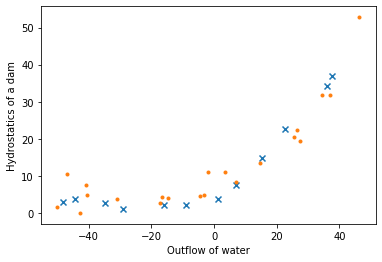

In [2]:
data.plot(marker='x')
data.plot_valid()

The visualization of the data indicates a strong non-linear correlation between these variables. A higher degree polynomial would describe the dependency better than a linear function. We therefore use polynomials by expanding our input matrix $X$ with higher-degree polynomials. The `polynomial` function we define below, assumes there is only one input variable in column $j=1$, it adds a variable/column $x^{(i)}_j$ for every degree (above 1) for which $x^{(i)}_j = (x_1^{(i)})^j$. 

This way, by transforming the input data, we can use the SKLearn LinearRegression function to fit a polynomial to the data.

In [3]:
def fit_poly(degree=1, scale=False):
    data = dam(degree=degree, scale=scale)
    model = linear_regression_ne(data)
    model.train()
    data.plot(marker = 'x')
    data.plot_valid()
    plt.ylim((-10,60))
    model.plot_line()

For our first experiment, we will just use linear regression on the data as is. The result is a first degree polynomial (a straight line) and we can see that such a function poorly fits the data. The model is overly simple, in other words **the model contains high bias**. 

0 0.00s train loss: 44.747813 valid loss: 58.867636



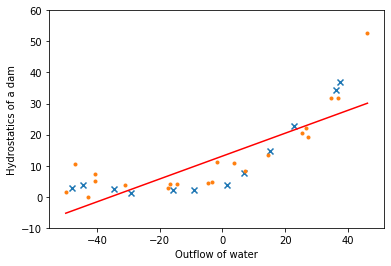

In [4]:
model1 = fit_poly()

As an alternative, we will plot a second degree polynomial (i.e. a parabole). We expand X with a new column that contains $x_0^2$. Always inspect the data to verify if the data was properly transformed. 

NB the bias column is not needed here since the SKLearn models include a bias by default.

NB2 Numpy's `set_printoptions` can be used to change the formatting from scientific notation to a more readable format.

In [5]:
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
dam(degree=2).train_X

array([[-15.937,  253.980],
       [-29.153,  849.896],
       [ 36.190,  1309.683],
       [ 37.492,  1405.664],
       [-48.059,  2309.651],
       [-8.941,  79.950],
       [ 15.308,  234.329],
       [-34.706,  1204.525],
       [ 1.389,  1.930],
       [-44.384,  1969.918],
       [ 7.014,  49.189],
       [ 22.763,  518.143]])

So we see that setting degree=2 will add a columns with $x_0^2$. Now let's use our function to fit the model and plot the result. We observe that a second degree polynomial is a much better description for this data set. The RMSE is much lower and the data points are much closer to the fitted function. 

0 0.00s train loss: 2.037322 valid loss: 13.989299



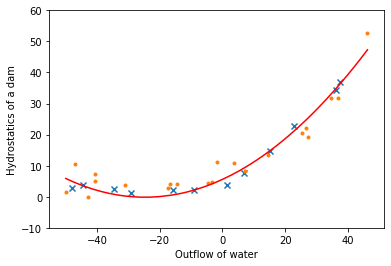

In [6]:
fit_poly(2)

So it is interesting to see that we improve the fit of the model by increasing the degree of the polynomial. Try it with several values and see what happens. Although the model seems to fit the trainingdata, the predictions on new data (in the validation) set are getting really bad! There are a few problems with polynomials that you should be aware of:

- beyond the domain in the trainingset, higher order functions do not extrapolate very well.
- when the order of the polynomial becomes too high, de model overfits on the trainingdata, a.k.a. connecting the dots.
- when the order of the polynomial increases you probably want to normalize (scale with mean 0 variance 1) the data, because of numeric instability.

Below is an example of an order 5 polynomial, notice how badly it extrapolates beyond x=40.

0 0.00s train loss: 0.416992 valid loss: 31.259174



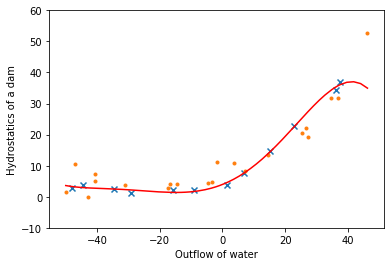

In [7]:
fit_poly(5)

When we increase the number of polynomials to 13, the model should be able to connect all the training points (a.k.a. connecting the dots). However, as you see, this does not happen. The reason is that numbers like $x^13$ are getting too high and cause numeric instability.                                                                                 

0 0.00s train loss: 6.119532 valid loss: 1283314.278312



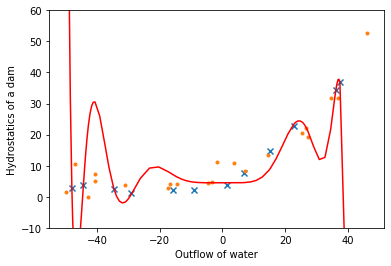

In [8]:
fit_poly(13)

When we scale the data, the numeric instability disappears, the function perfectly connects the dots and the loss of the training set is 0. This shows that normalizing the data is necessary when there is a magnitude of difference between the features. However, this does not help against overfitting, the learned model is a bad predictor on the validation set.

0 0.00s train loss: 0.000000 valid loss: 108683.329936



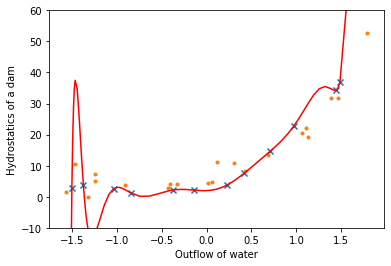

In [11]:
fit_poly(30, scale=True)

Notice that an order-13 polynomial also connects all the dots, and although less erradic, may still be a poor predictor for unseen examples. Extrapolation is particularly poor, but if you look closely the six validation points on the right-hand side are all further off than when using a simple model.

0 0.00s train loss: 0.000000 valid loss: 16015.871776



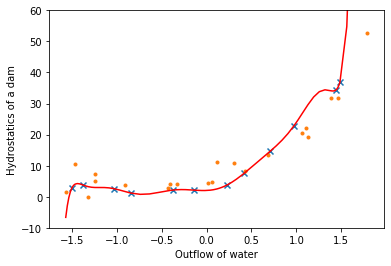

In [12]:
fit_poly(13, scale=True)